In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/reglab.txt", sep="\t")
df

,y,x1,x2,x3,x4
0,3.469720,0.233628,0.835549,0.102965,0.457428
1,0.768448,0.117920,0.090544,0.258778,0.283951
2,2.880374,0.091520,0.797592,0.198528,0.699287
3,3.745485,0.876722,0.062935,0.615415,0.176058
4,1.853966,0.207406,0.303490,0.775967,0.667351
...,...,...,...,...,...
195,0.820625,0.163545,0.033599,0.383312,0.645846
196,4.676726,0.983839,0.225527,0.127676,0.757216
197,3.471228,0.661587,0.231570,0.800238,0.609558
198,3.633997,0.828217,0.076275,0.129719,0.965084


In [3]:
df.describe()

,y,x1,x2,x3,x4
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.586346,0.510916,0.484160,0.493104,0.479862
std,1.408295,0.290918,0.295483,0.286916,0.282165
min,0.768448,0.003012,0.000040,0.005894,0.001680
25%,2.460495,0.243641,0.218592,0.247322,0.242880
50%,3.556370,0.535503,0.493677,0.506295,0.477532
75%,4.666696,0.775323,0.754869,0.748527,0.704679
max,6.840503,0.983839,0.998332,0.996059,0.987926


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_df, test_df = train_test_split(df, random_state=42, test_size=0.3)

In [6]:
features = ["x1", "x2", "x3", "x4"]
target = "y"

In [7]:
from itertools import combinations
from tqdm import tqdm
import numpy as np
from sklearn.linear_model import LinearRegression

In [9]:
best_subsets = {}

for k in range(1, len(features) + 1):
    best_rss = np.inf
    best_features = None

    for combo in combinations(features, k):
        X_subset_train = train_df[features][list(combo)]
        X_subset_test = test_df[features][list(combo)]
        model = LinearRegression().fit(X_subset_train, train_df[target])
        y_pred = model.predict(X_subset_test)
        rss = np.sum((test_df[target] - y_pred) ** 2)

        if rss < best_rss:
            best_rss = rss
            best_features = combo
        print(combo, rss)

    best_subsets[k] = {"features": best_features, "RSS": best_rss}

('x1',) 39.273519074333336
('x2',) 81.76001405302839
('x3',) 116.50033683806495
('x4',) 116.38307781451033
('x1', 'x2') 0.12782460063364573
('x1', 'x3') 39.93809270322655
('x1', 'x4') 40.153698661814666
('x2', 'x3') 81.52950229612844
('x2', 'x4') 81.91093362181661
('x3', 'x4') 116.50840905367276
('x1', 'x2', 'x3') 0.08367511986102542
('x1', 'x2', 'x4') 0.09686547610918858
('x1', 'x3', 'x4') 40.45583103337049
('x2', 'x3', 'x4') 81.80187004308706
('x1', 'x2', 'x3', 'x4') 0.047065353576703585


In [10]:
best_subsets

{1: {'features': ('x1',), 'RSS': np.float64(39.273519074333336)},
 2: {'features': ('x1', 'x2'), 'RSS': np.float64(0.12782460063364573)},
 3: {'features': ('x1', 'x2', 'x3'), 'RSS': np.float64(0.08367511986102542)},
 4: {'features': ('x1', 'x2', 'x3', 'x4'),
  'RSS': np.float64(0.047065353576703585)}}

In [11]:
n = len(df[target])
aic_values = {}
bic_values = {}

for k in best_subsets:
    rss = best_subsets[k]["RSS"]
    aic = n * np.log(rss / n) + 2 * (k + 1)
    bic = n * np.log(rss / n) + (k + 1) * np.log(n)
    aic_values[k] = aic
    bic_values[k] = bic

In [12]:
optimal_k_aic = min(aic_values, key=aic_values.get)
optimal_k_bic = min(bic_values, key=bic_values.get)

In [13]:
optimal_k_aic, optimal_k_bic

(4, 4)

In [14]:
best_subsets[optimal_k_aic]["features"], best_subsets[optimal_k_bic]["features"]

(('x1', 'x2', 'x3', 'x4'), ('x1', 'x2', 'x3', 'x4'))

In [15]:
import matplotlib.pyplot as plt

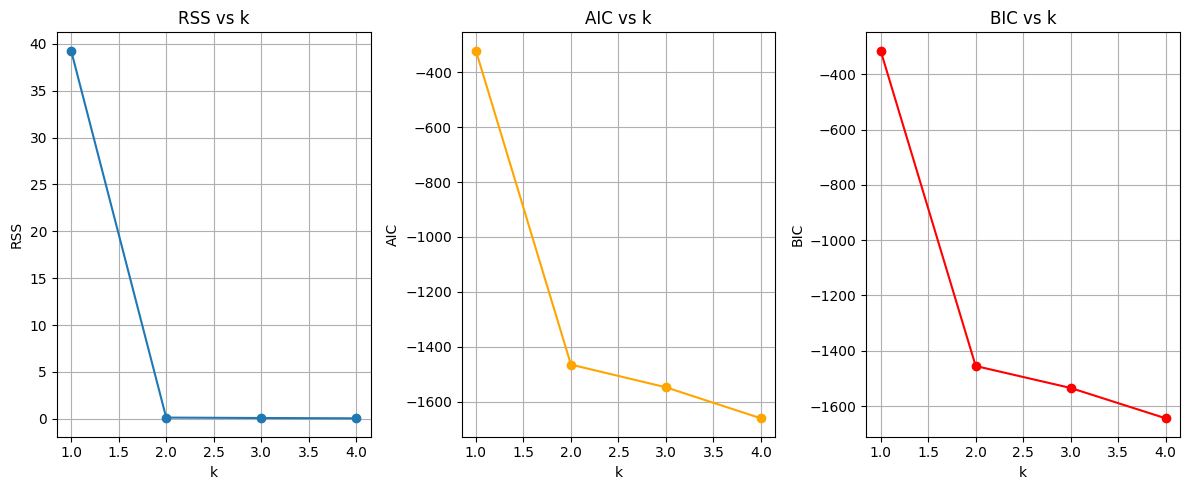

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(
    list(best_subsets.keys()), [v["RSS"] for v in best_subsets.values()], marker="o"
)
plt.xlabel("k")
plt.ylabel("RSS")
plt.grid(True)
plt.title("RSS vs k")

plt.subplot(1, 3, 2)
plt.plot(list(aic_values.keys()), list(aic_values.values()), marker="o", color="orange")
plt.xlabel("k")
plt.ylabel("AIC")
plt.grid(True)
plt.title("AIC vs k")

plt.subplot(1, 3, 3)
plt.plot(list(bic_values.keys()), list(bic_values.values()), marker="o", color="red")
plt.xlabel("k")
plt.ylabel("BIC")
plt.grid(True)
plt.title("BIC vs k")

plt.tight_layout()
plt.show()